In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [15]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [21]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_2 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 109ms/step - loss: 1.2998 - accuracy: 0.5780 - val_loss: 1.0685 - val_accuracy: 0.5888
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6043 - accuracy: 0.6867 - val_loss: 0.6454 - val_accuracy: 0.6376
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5019 - accuracy: 0.7587 - val_loss: 0.4527 - val_accuracy: 0.7914
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4249 - accuracy: 0.8067 - val_loss: 0.4374 - val_accuracy: 0.7992
Epoch 5/10
625/625 [==============================] - 79s 125ms/step - loss: 0.3807 - accuracy: 0.8301 - val_loss: 0.9051 - val_accuracy: 0.5420
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3251 - accuracy: 0.8575 - val_loss: 0.3863 - val_accuracy: 0.8344
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2472 - accuracy: 0.8933 - val_loss: 0.7643 - val_ac

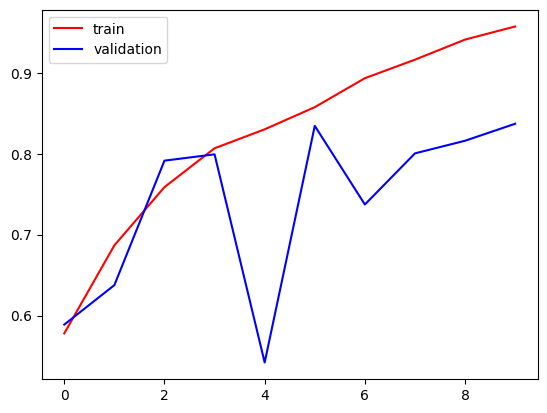

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

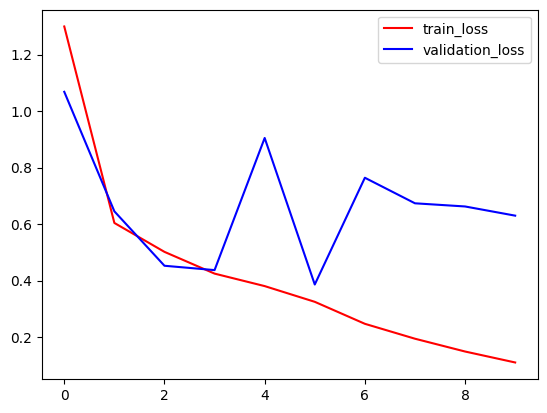

In [27]:
plt.plot(history.history['loss'], color = 'red',label='train_loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation_loss')
plt.legend()
plt.show()

In [28]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [29]:
# Prediction on unseen Data

In [53]:
import cv2

In [63]:
test_img = cv2.imread('/content/dog.14.jpg')

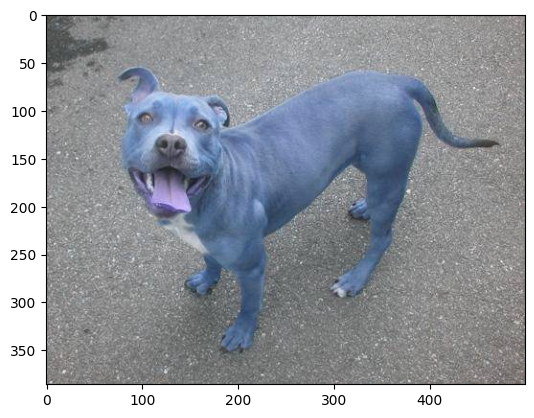

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(386, 500, 3)

In [66]:
test_img_resize = cv2.resize(test_img,(256,256))

In [67]:
test_input = test_img_resize.reshape((1,256,256,3))

In [68]:
# dog 1
# cat 0
model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

In [69]:
def check_prediction_cat_dog(prediction):
  test_img = cv2.imread(prediction)
  test_img_resize = cv2.resize(test_img,(256,256))
  print(plt.imshow(test_img) )
  test_input = test_img_resize.reshape((1,256,256,3))
  print(model.predict(test_input))


AxesImage(size=(173, 237))
1/1 [==============================] - 0s 27ms/step
[[0.]]


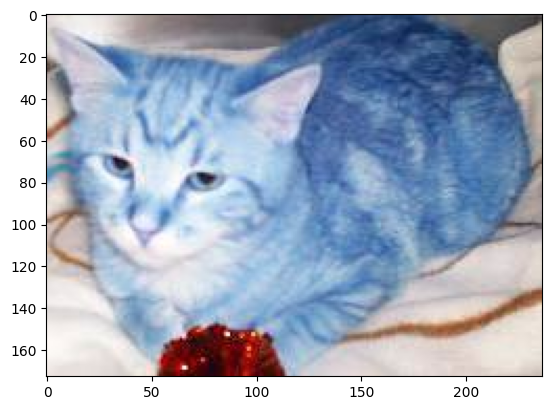

In [70]:
check_prediction_cat_dog('/content/cat.42.jpg')

AxesImage(size=(386, 500))
1/1 [==============================] - 0s 17ms/step
[[1.]]


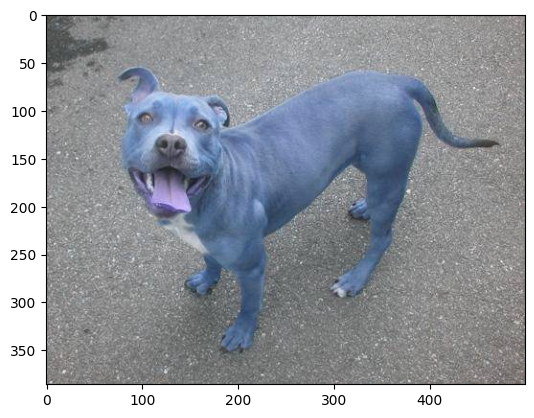

In [71]:
check_prediction_cat_dog('/content/dog.14.jpg')

In [72]:
def img_predict(predict_class):
  if predict_class == 0:
    print("Cat")
  else:
    print("Dog")

In [73]:
img_predict(model.predict(test_input))

1/1 [==============================] - 0s 18ms/step
Dog
